[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/How-to-Learn-to-Code/python-class/blob/master/Lesson_4_FileIO/Lesson_4_student.ipynb)

# Lesson 4 - File IO and string manipulation

Learning objectives: Students will be able to load text files into Python objects, and learn to manipulate file names and strings.

Specific skills:

* Loading text from files
* Using context managers to safely open and close files
* Basic string manipulation
* Using loops to load many files
* Writing list comprehensions

# Introduction

Every program has an input and an output. In science, the input is usually your raw data; the output can be anything from processed data, statistical tests, model predictions, or figures for a paper or presentation. In any case, loading your input data is one of the first tasks that you will have to execute in your code.

You have already seen how to load data into a `pandas.DataFrame`. However, not all data will be formatted this way. This lesson will teach you how to deal with text files, but the tools learned here will be applicable to a variety of different file types that you may come accross in your research.


# Motivating Example

You are analyzing data, and your collaborator just sent you several files containing lists of genes that are upregulated in specific cell types. You might be interested in using these gene lists to determine how similar cells in your data set are to the cell types discovered by your collaborator. You have all the files in a single directory, but now you need to figure out how to import all of the gene lists into Python.

How do you go about reading the data from all of these files? We will learn about the tools for reading data in this lesson.

# Setup

We will be using data in external files for this lesson, so we will need a way to access these. In Colab, we can do this by cloning the data from GitHub. You can also access your Google Drive from Colab, by mounting your Drive every time you open your notebook.

We clone from github using a language called bash. This language is specialized for communicating with UNIX operating systems, including MacOS and Linux (Google Colab is running your notebook on a Linux server). We can run bash commands in our notebook by starting a line with an exclamation point or percent sign.

In [ ]:
!git clone https://github.com/How-to-Learn-to-Code/python-class.git

Now we have access to all the files in the GitHub repository. Next, we want to change the folder where our code will execute. This is called the **working directory**. We can change the working directory using the `cd` bash command.

In [ ]:
%cd python-class/Lesson_4_FileIO/

If we want to check that we are in the correct working directory, we can tell bash to print our current working directory using the command `pwd`.

In [ ]:
!pwd

We can also see all the files in our current directory, using the "list" command `ls`.

In [ ]:
!ls

# Files

In [1]:
filepath = 'dna.txt'
my_file = open(filepath)

### File Objects

* cannot directly print a file object

In [2]:
print(my_file)

<_io.TextIOWrapper name='dna.txt' mode='r' encoding='UTF-8'>


### Reading a file object

In [3]:
file_contents = my_file.read()
print (file_contents)

ATATCGCGAA



### "Exhausting" a file

In [4]:
my_file = open(filepath)
print(my_file.read())

ATATCGCGAA



In [5]:
print(my_file.read())

No output is displayed because the file object has already been read through.

The file must be read in again to start from the beginning.

Storing the output into a variable (`file_contents`) allows us to use the file data without worry about this.

In [6]:
print (file_contents)

ATATCGCGAA



### Working with the file

In [7]:
dna_length = len(file_contents)
print('sequence is ' + file_contents + ' and the length is ' + str(dna_length))

sequence is ATATCGCGAA
 and the length is 11


Output looks strange and the length is incorrect due to a hidden newline (`'\n'`) character

The file we read in is actually 2 lines with the second line being blank

### Stripping

In [8]:
my_dna_strip = file_contents.strip('\n')
print('sequence is ' + my_dna_strip + ' and the length is ' + str(len(my_dna_strip)))

sequence is ATATCGCGAA and the length is 10


`.strip()` removes any leading or trailing instances of the given character

In [9]:
new_dna = my_dna_strip.strip('A')
print(new_dna)

TATCGCG


### Closing files

It's good programming practice to close files once you have read from them.
There are limits by your OS on how many files can be kept open. 

In [10]:
my_file2 = open('three_seq.txt')
file_contents2 = my_file2.read()
my_file2.close()

## Context management

Writing code to close your file every time you open it is a pain. Fortunately, there is a clean way to deal with this. The Python `with` statement is known as a context manager, since it is responsible for the context in which the file is being manipulated. What this means, is that the file will automatically be closed once you exit the `with` statement.

This is how it works:

In [11]:
with open('three_seq.txt') as file_handle:
    file_contents2 = file_handle.read()

In [12]:
file_contents2

'ATCAGACGCGCAGAGGAGGCGGGGCCGCGGCTGGTTTCCTGCCGGGGGGCGGCTCTGGGCCGCCGAGTCCCCTCCTCCCGCCCCTGAGGAGGAGGAGCCGCCGCCACCCGCCGCGCCCGACACCCGGGAGGCCCCGCCAGCCCGCGGGAGAGGCCCAGCGGGAGTCGCGGAACAGCAGGCCCGAGCCCACCGCGCCGGGCCCCGGACGCCGCGCGGAAAAG\nCTGCTCCGGAGTGACGCGGGCCCGGGCGCGACGGTCTCGGCGGCGGCGGCGGCGGCGACAGAGCGAGCGCGGCGCGGGGCCACC\nAGAAGGAGGGCGTGGTAATATGAAGTCAGTTCCGGTTGGTGTAAAACCCCCGGGGCGGCGGCGAACTGGCTTTAGATGCTTCTGGGTCGCGGTGTGCTAAGCGAGGAGTCCGAGTGTGTGAGCTTGAGAGCCGCGCGCTAGAGCGACCCGGCGAGGG'

## Reading many lines

Oftentimes the text file we are using will be organized line by line. In this case, rather than reading the whole thing at once, it makes sense to read each line into a different element of a list.

In [13]:
with open('three_seq.txt') as handle:
    seqs = handle.read()
    seq_list = seqs.splitlines()

In [14]:
print(seq_list)

['ATCAGACGCGCAGAGGAGGCGGGGCCGCGGCTGGTTTCCTGCCGGGGGGCGGCTCTGGGCCGCCGAGTCCCCTCCTCCCGCCCCTGAGGAGGAGGAGCCGCCGCCACCCGCCGCGCCCGACACCCGGGAGGCCCCGCCAGCCCGCGGGAGAGGCCCAGCGGGAGTCGCGGAACAGCAGGCCCGAGCCCACCGCGCCGGGCCCCGGACGCCGCGCGGAAAAG', 'CTGCTCCGGAGTGACGCGGGCCCGGGCGCGACGGTCTCGGCGGCGGCGGCGGCGGCGACAGAGCGAGCGCGGCGCGGGGCCACC', 'AGAAGGAGGGCGTGGTAATATGAAGTCAGTTCCGGTTGGTGTAAAACCCCCGGGGCGGCGGCGAACTGGCTTTAGATGCTTCTGGGTCGCGGTGTGCTAAGCGAGGAGTCCGAGTGTGTGAGCTTGAGAGCCGCGCGCTAGAGCGACCCGGCGAGGG']


You can also chain the commands to fit on a single line:

In [15]:
with open('three_seq.txt') as handle:
    seq_list2 = handle.read().splitlines()

In [16]:
print(seq_list2)

['ATCAGACGCGCAGAGGAGGCGGGGCCGCGGCTGGTTTCCTGCCGGGGGGCGGCTCTGGGCCGCCGAGTCCCCTCCTCCCGCCCCTGAGGAGGAGGAGCCGCCGCCACCCGCCGCGCCCGACACCCGGGAGGCCCCGCCAGCCCGCGGGAGAGGCCCAGCGGGAGTCGCGGAACAGCAGGCCCGAGCCCACCGCGCCGGGCCCCGGACGCCGCGCGGAAAAG', 'CTGCTCCGGAGTGACGCGGGCCCGGGCGCGACGGTCTCGGCGGCGGCGGCGGCGGCGACAGAGCGAGCGCGGCGCGGGGCCACC', 'AGAAGGAGGGCGTGGTAATATGAAGTCAGTTCCGGTTGGTGTAAAACCCCCGGGGCGGCGGCGAACTGGCTTTAGATGCTTCTGGGTCGCGGTGTGCTAAGCGAGGAGTCCGAGTGTGTGAGCTTGAGAGCCGCGCGCTAGAGCGACCCGGCGAGGG']


## Exercises

How would you check that `seq_list` and `seq_list2` are identical?

In [17]:
# your code goes here

Write a function to read a text file into a list of lines. Test your code using the examples below.

In [18]:
# feel free to change your function name to something more descriptive!
def file_reader(path):
    
    return 

In [19]:
file_reader('dna.txt')[0]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
my_file_test = file_reader('dna.txt')[0]
assert my_file_test == 'ATATCGCGAA'
seq_list_test = file_reader('three_seq.txt')
assert seq_list_test == seq_list

# Manipulating strings

There are a few useful things we can do with strings.

First, we can find and replace text using the `replace()` function. This can be useful for stripping file extensions:

In [20]:
'some_file.txt'.replace('.txt', '')

'some_file'

The first argument to `replace()` is the pattern we are searching for in the string, and the second argument is what we want to replace it with.

In [21]:
'this is a STRING'.replace('STRING', 'pizza')

'this is a pizza'

There are several other useful tools for working with strings. For example, `upper()` and `lower()` can be used to make all characters in a string upper- or lower-case. `swapcase()` switches all upper- and lower-case letters.

In [22]:
print('lower2upper'.upper())
print('UPPER2LOWER'.lower())
print('cAmElCaSe'.swapcase())

LOWER2UPPER
upper2lower
CaMeLcAsE


Strings can be concatenated using the addition operator:

In [23]:
'str' + 'ing'

'string'

Variables can be inserted into strings by first converting them into strings and then concatenating them:

In [24]:
my_name = 'NAME'
my_age = None
# fails because my_age is not a string
print('My name is ' + my_name + ' and my age is ' + my_age)

TypeError: can only concatenate str (not "NoneType") to str

In [25]:
print('My name is ' + my_name + ' and my age is ' + str(my_age))

My name is NAME and my age is None


As of Python 3.6, the easiest way to format strings is using f-strings:

In [26]:
print(f'My name is {my_name} and my age is {my_age}')

My name is NAME and my age is None


Sometimes it is useful to check if a certain pattern is present within a string. Here is one way to do this:

In [27]:
print('hi' in 'this is a test')
print('ahoy' in 'this is a test')

True
False


## Exercises

Convert all nucleotides in 'dna.txt' to lowercase.

In [28]:
# your code here

Use f-strings to append a poly-A tail to each sequence in 'seq_list.txt'.

In [29]:
# your code here

# Reading multiple files

To go from reading a single file to reading multiple files, use a `for` loop.

First, we need get all the file names in a directory. We can do this using the `os` library.

In [30]:
import os
data_dir = 'gene_sets'
files = os.listdir(data_dir)
files

['.ipynb_checkpoints',
 'junk_files',
 'HALLMARK_G2M_CHECKPOINT.v7.5.1.grp',
 'HALLMARK_APOPTOSIS.v7.5.1.grp',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING.v7.5.1.grp',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB.v7.5.1.grp',
 'HALLMARK_INFLAMMATORY_RESPONSE.v7.5.1.grp']

We want to read the hallmark gene sets, however there is also a folder of 'junk' files that we do not want to read. This often occurs if you use a program that stores temporary files--for example, Excel.

We will filter only the files with the extension we want.

In [31]:
gene_set_files = []
for file in files:
    if '.grp' in file:
        gene_set_files.append(file)

In [32]:
gene_set_files

['HALLMARK_G2M_CHECKPOINT.v7.5.1.grp',
 'HALLMARK_APOPTOSIS.v7.5.1.grp',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING.v7.5.1.grp',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB.v7.5.1.grp',
 'HALLMARK_INFLAMMATORY_RESPONSE.v7.5.1.grp']

To do this, we had to initialize an empty list and use a nested `if` statement within a `for` loop to append to the list only under a certain condition--if a file name included the extension we want to read.

This is a lot of boilerplate, however there is a better way: using list comprehensions.

In [33]:
gene_set_files = [f for f in files if ('.grp' in f)]
gene_set_files

['HALLMARK_G2M_CHECKPOINT.v7.5.1.grp',
 'HALLMARK_APOPTOSIS.v7.5.1.grp',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING.v7.5.1.grp',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB.v7.5.1.grp',
 'HALLMARK_INFLAMMATORY_RESPONSE.v7.5.1.grp']

List comprehensions are just shorthand for a for loop that populates a list. You can use them to shorten straight-forward for loops, like the one above.

Here are some more examples of list comprehensions:

In [34]:
# string manipulation
[f'This is a {string}' for string in ['mouse', 'moose', 'pipette']]

['This is a mouse', 'This is a moose', 'This is a pipette']

In [35]:
# arithmetic
numbers = [1, 2, 3, 4, 5]
mean = sum(numbers)/len(numbers)
[number - mean for number in numbers]

[-2.0, -1.0, 0.0, 1.0, 2.0]

When in doubt, you can always write a list comprehension as a full `for` loop.

Now, we will use a list comprehension to read all the gene sets into a list, using the `file_reader()` function that you wrote in the first section of the lesson.

In [36]:
gene_sets = [file_reader(f'{data_dir}/{f}') for f in gene_set_files]
print(gene_sets[0])

None


Here is what the code might look like without using a list comprehension:

In [37]:
gene_sets = []  # initialize empty list of output
for file in gene_set_files:
    fname = f'{data_dir}/{file}'  # f-string to get full path to file
    with open(fname) as handle:
        tmp = handle.read().splitlines()  # temporary variable containing text
    gene_sets.append(tmp)  # add tmp to output list

The gene lists each contain the gene set name and a url as the first two elements. The rest of the list consists of genes in the set. We want to filter the lists to contain only the genes of interest. We can use a list comprehension to keep the 2nd through the last element of each gene list:

In [38]:
gene_set_names = [gene_list[0] for gene_list in gene_sets]  # extract names
gene_sets = [gene_list[2::] for gene_list in gene_sets]

In [39]:
gene_set_names

['HALLMARK_G2M_CHECKPOINT',
 'HALLMARK_APOPTOSIS',
 'HALLMARK_PI3K_AKT_MTOR_SIGNALING',
 'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
 'HALLMARK_INFLAMMATORY_RESPONSE']

In [40]:
print(gene_sets)

[['ABL1', 'AMD1', 'ARID4A', 'ATF5', 'ATRX', 'AURKA', 'AURKB', 'BARD1', 'BCL3', 'BIRC5', 'BRCA2', 'BUB1', 'BUB3', 'CASP8AP2', 'CBX1', 'CCNA2', 'CCNB2', 'CCND1', 'CCNF', 'CCNT1', 'CDC20', 'CDC25A', 'CDC25B', 'CDC27', 'CDC45', 'CDC6', 'CDC7', 'CDK1', 'CDK4', 'CDKN1B', 'CDKN2C', 'CDKN3', 'CENPA', 'CENPE', 'CENPF', 'CHAF1A', 'CHEK1', 'CHMP1A', 'CKS1B', 'CKS2', 'CTCF', 'CUL1', 'CUL3', 'CUL4A', 'CUL5', 'DBF4', 'DDX39A', 'DKC1', 'DMD', 'DR1', 'DTYMK', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'EFNA5', 'EGF', 'ESPL1', 'EWSR1', 'EXO1', 'EZH2', 'FANCC', 'FBXO5', 'FOXN3', 'G3BP1', 'GINS2', 'GSPT1', 'H2AX', 'H2AZ1', 'H2AZ2', 'H2BC12', 'HIF1A', 'HIRA', 'HMGA1', 'HMGB3', 'HMGN2', 'HMMR', 'HNRNPD', 'HNRNPU', 'HOXC10', 'HSPA8', 'HUS1', 'ILF3', 'INCENP', 'JPT1', 'KATNA1', 'KIF11', 'KIF15', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A', 'KIF5B', 'KMT5A', 'KNL1', 'KPNA2', 'KPNB1', 'LBR', 'LIG3', 'LMNB1', 'MAD2L1', 'MAP3K20', 'MAPK14', 'MARCKS', 'MCM2', 'MCM3', 'MCM5', 'MCM6', 'MEIS1', 'MEIS2', 'MKI67', 'MNAT1', 'MT2

## Exercises

Use string manipulation and a for loop or list comprehension to get rid of the version numbers and file extensions in `gene_set_files`. The output should be identical to `gene_set_names`.

In [41]:
# your code here

We don't actually need to have 'HALLMARK_' before every gene set name. Use string manipulation and a for loop or list comprehension to remove it.

In [42]:
# your code here

# Visualization: pulling it all together

Now that we've read the gene sets, we can use them to calculate how much a cell is expressing the genes in each set. Then, we can visualize the expression of these genes in different cell populations.



*Note: this section will use some packages and code that you have not encountered. That's okay--you don't have to understand all of it. The goal is just so you can see how you might use these files as part of a larger project.*

In [43]:
import scanpy as sc
data = sc.datasets.pbmc3k_processed()
for gene_set, gene_set_name in zip(gene_sets, gene_set_names):
    sc.tl.score_genes(data, gene_set, score_name = gene_set_name)

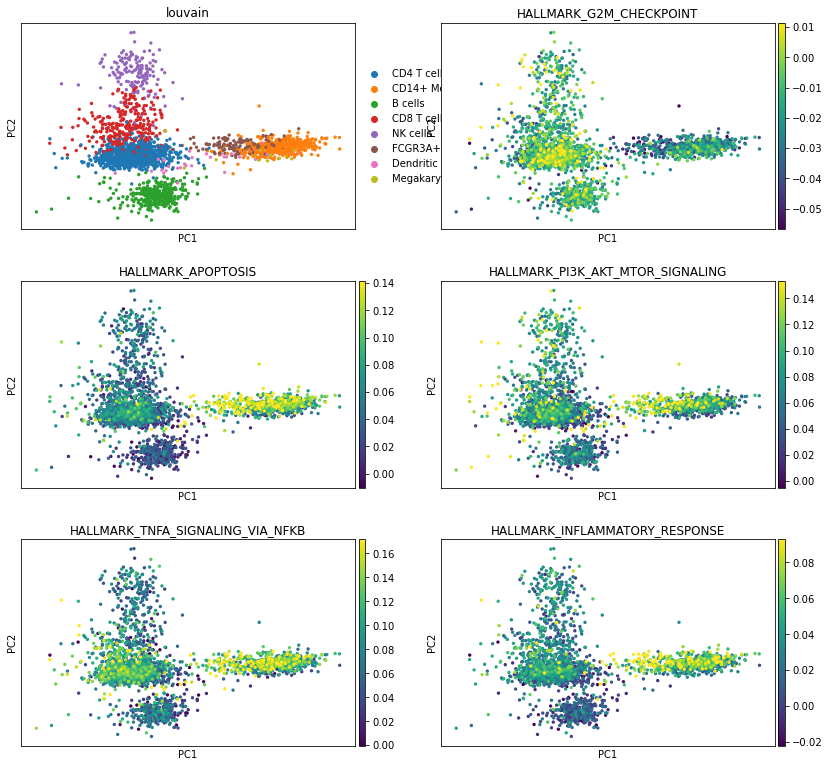

In [44]:
sc.tl.pca(data)
sc.pl.pca(data, color = ['louvain'] + gene_set_names, ncols = 2, 
          vmin = 'p1.5', vmax = 'p97.5')

The gene sets were able to help us visualize what kinds of cellular processes are occurring in different immune cell types--for example, we find that NK and dendritic cells have the highest inflammatory responses, while CD4 T cells have the highest expression of G2M checkpoint genes.